# Clustering with K-means

In [70]:
library(class)

## With swiss data

In [5]:
data(swiss)

In [6]:
out = kmeans(swiss, centers = 3)

In [7]:
print(out)

K-means clustering with 3 clusters of sizes 6, 10, 31

Cluster means:
  Fertility Agriculture Examination Education Catholic Infant.Mortality
1  74.96667    83.20000     6.50000  4.666667 99.47833         17.78333
2  83.90000    54.91000    11.20000  7.800000 94.15300         22.57000
3  64.77097    42.99032    20.12903 13.225806 12.75355         19.51290

Clustering vector:
  Courtelary     Delemont Franches-Mnt      Moutier   Neuveville   Porrentruy 
           3            2            2            3            3            2 
       Broye        Glane      Gruyere       Sarine      Veveyse        Aigle 
           2            2            2            2            2            3 
     Aubonne     Avenches     Cossonay    Echallens     Grandson     Lausanne 
           3            3            3            3            3            3 
   La Vallee       Lavaux       Morges       Moudon        Nyone         Orbe 
           3            3            3            3            3     

* first size of each group
* then the means of each cluster for each variable = "average guy" for each cluster.
* then assignement to each individuals to each group
* finally the g(K) value.

In [74]:

out = kmeans(swiss, centers = 3)
out$tot.withinss

[1] 21616.1

In [75]:
out$betweenss/out$totss

[1] 0.8175599

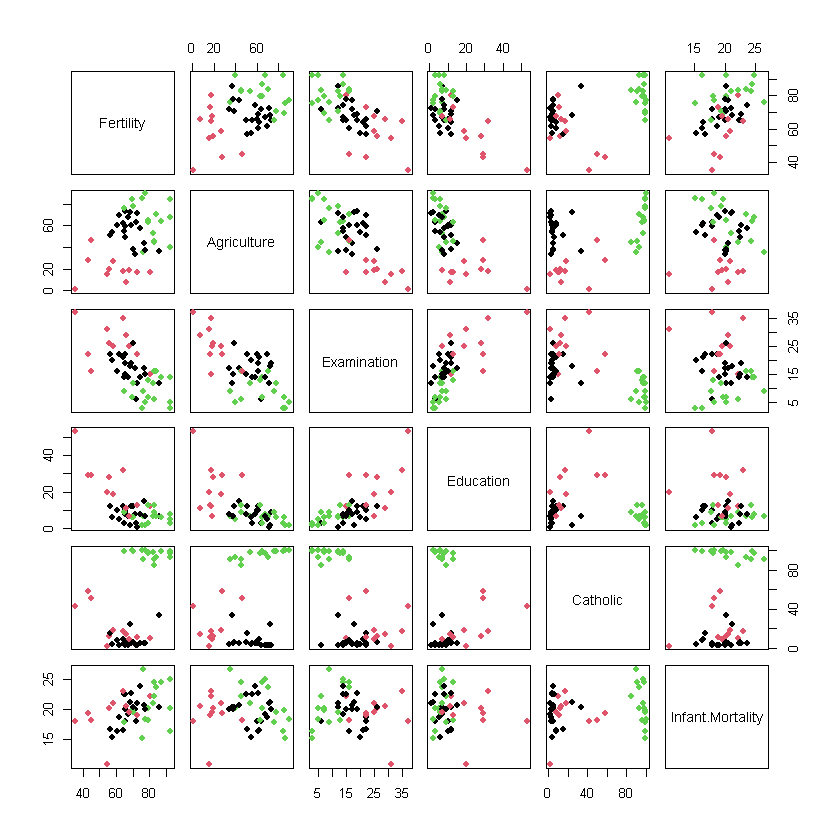

In [76]:
pairs(swiss,col=out$cluster,pch=19)

* one cluster for "big" cities
* one cluster for catholic cities
* one cluster for protestant cities

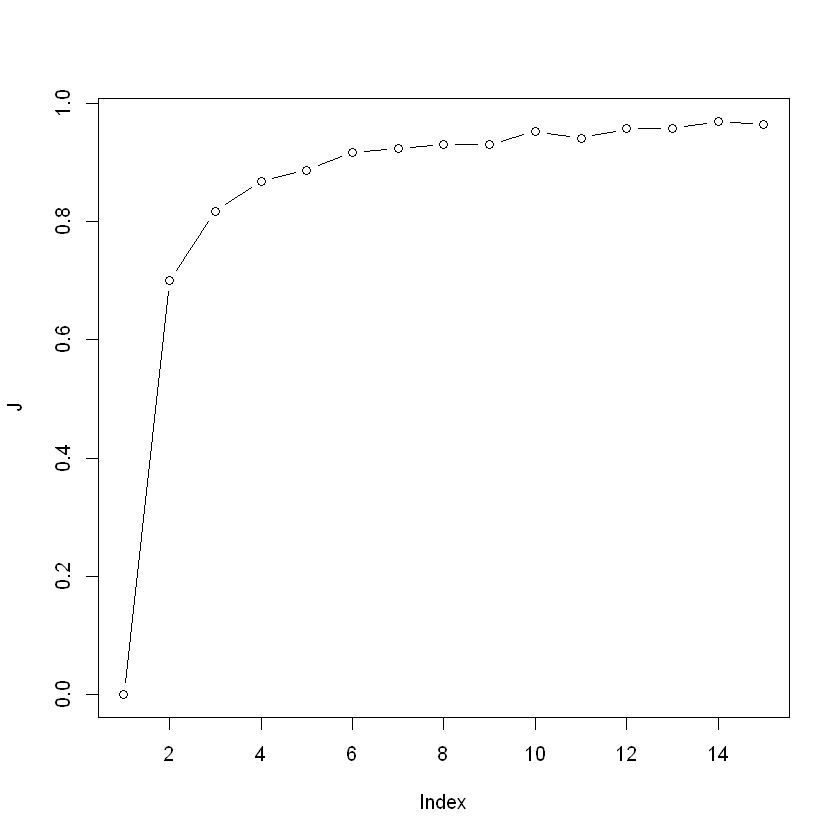

In [77]:
J = c()
#options(warn=-1)
for (k in 1:15)
{
    out = out = kmeans(swiss, centers = k)
    J[k] = out$betweenss/out$totss
}
plot(J,type='b')



The curve sometime decrease, because the alogrythms change its init points at each time.

**The solution is to run several time with the same k : nstart = 10**

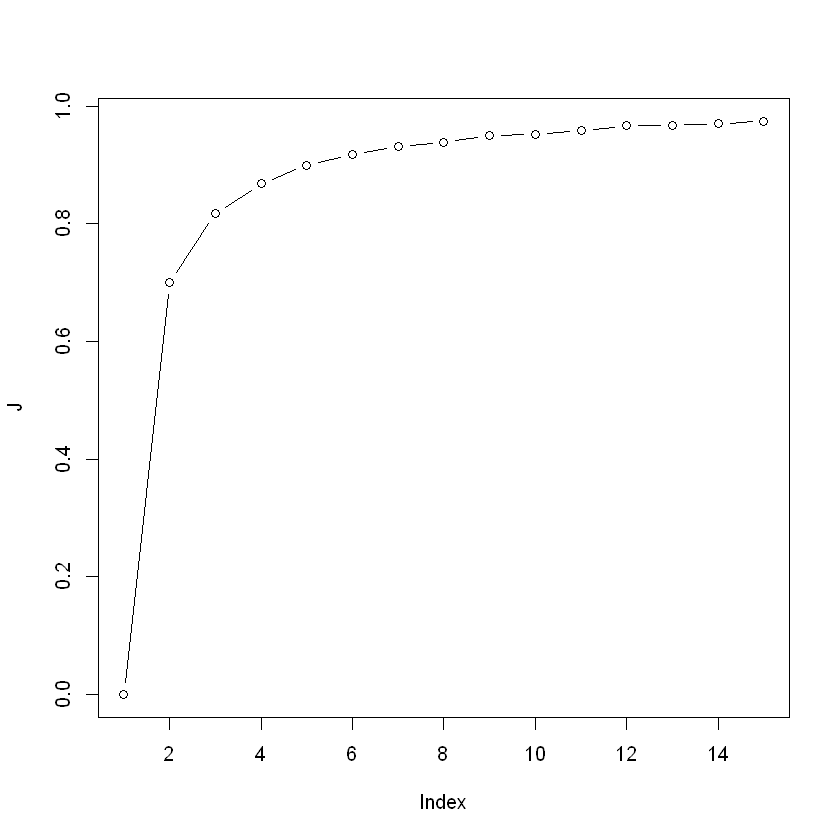

In [78]:
J = c()
#options(warn=-1)
for (k in 1:15)
{
    out = kmeans(swiss, centers = k,nstart = 10)
    J[k] = out$betweenss/out$totss
}
plot(J,type='b')


The choice could be K = 4

In [79]:
out = kmeans(swiss, centers = 4,nstart = 10)


**When we run ten times (nstart = 10) the result is the clustering with the best j(K)**

In [80]:
out

K-means clustering with 4 clusters of sizes 12, 16, 16, 3

Cluster means:
  Fertility Agriculture Examination Education Catholic Infant.Mortality
1  68.70000    23.80000    23.16667  14.66667 11.74333         19.71667
2  80.55000    65.51875     9.43750   6.62500 96.15000         20.77500
3  66.31250    60.72500    16.93750   7.68750  6.45875         19.55000
4  40.83333    25.16667    25.00000  37.00000 50.36667         18.50000

Clustering vector:
  Courtelary     Delemont Franches-Mnt      Moutier   Neuveville   Porrentruy 
           1            2            2            1            3            2 
       Broye        Glane      Gruyere       Sarine      Veveyse        Aigle 
           2            2            2            2            2            3 
     Aubonne     Avenches     Cossonay    Echallens     Grandson     Lausanne 
           3            3            3            3            1            1 
   La Vallee       Lavaux       Morges       Moudon        Nyone        

Now the clustering means :
* catholic
* protestant
* big cities : 3
* protestant , no agriculture and protestant

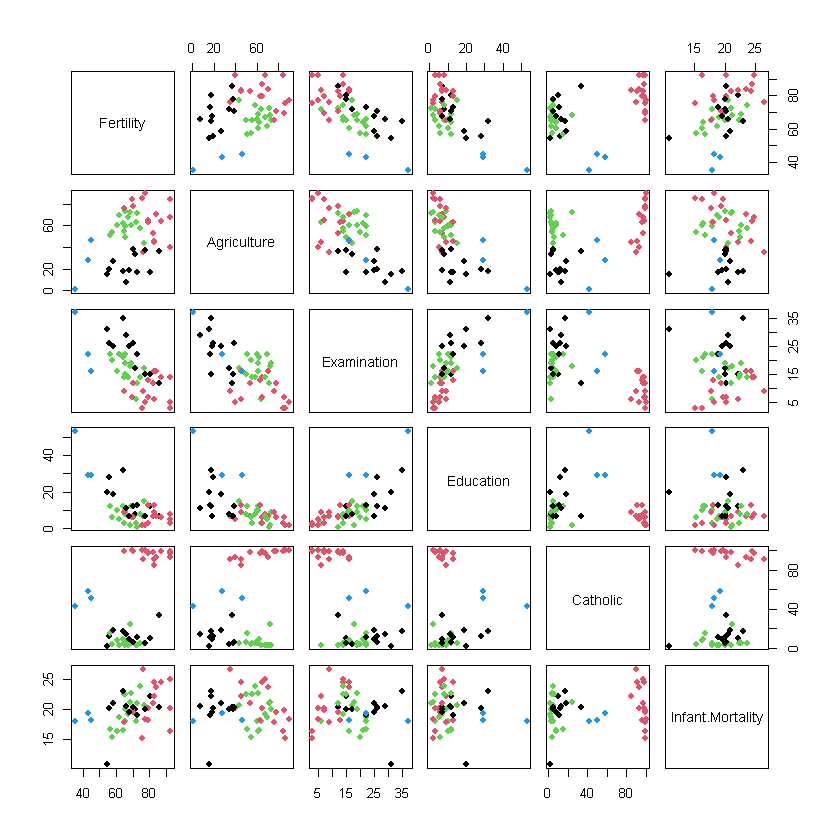

In [81]:
pairs(swiss,col=out$cluster,pch=19)

# Hierarchical clustering

In [82]:
library(class)

**The input data is not the X variable but a matrices with the distances between the observations**

In [1]:
data(swiss)

In [2]:
D = dist(swiss)
out = hclust(D,method='complete')

In [3]:
out


Call:
hclust(d = D, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 47 


**To see the result we have to plot the Dendogram**

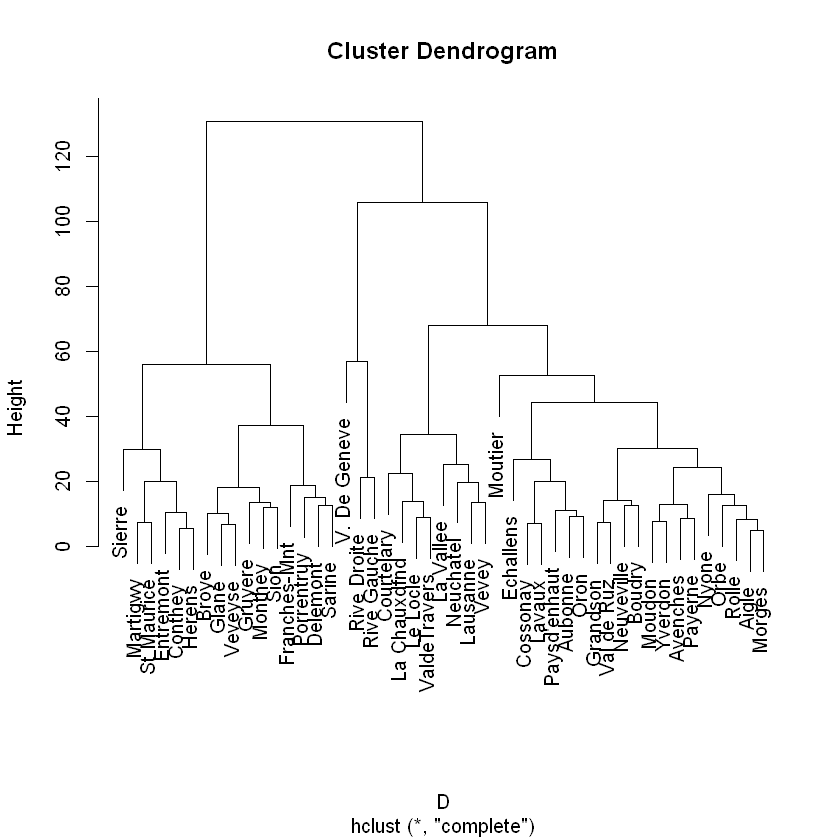

In [4]:
plot(out)

**Here when looking at the Dendogram we may choose to cut the tree at k=3 because it's there that the step is the biggest.**

In order to obtain the clustering final partition, we have to cut the tree at the level k=3

In [87]:
cl = cutree(out,k=3)
print(cl)

  Courtelary     Delemont Franches-Mnt      Moutier   Neuveville   Porrentruy 
           1            2            2            1            1            2 
       Broye        Glane      Gruyere       Sarine      Veveyse        Aigle 
           2            2            2            2            2            1 
     Aubonne     Avenches     Cossonay    Echallens     Grandson     Lausanne 
           1            1            1            1            1            1 
   La Vallee       Lavaux       Morges       Moudon        Nyone         Orbe 
           1            1            1            1            1            1 
        Oron      Payerne Paysd'enhaut        Rolle        Vevey      Yverdon 
           1            1            1            1            1            1 
     Conthey    Entremont       Herens     Martigwy      Monthey   St Maurice 
           2            2            2            2            2            2 
      Sierre         Sion       Boudry La Chauxdfnd 

We can also use the numeric values in the out to draw a similar curse as for k-means

In [88]:
names(out)

[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

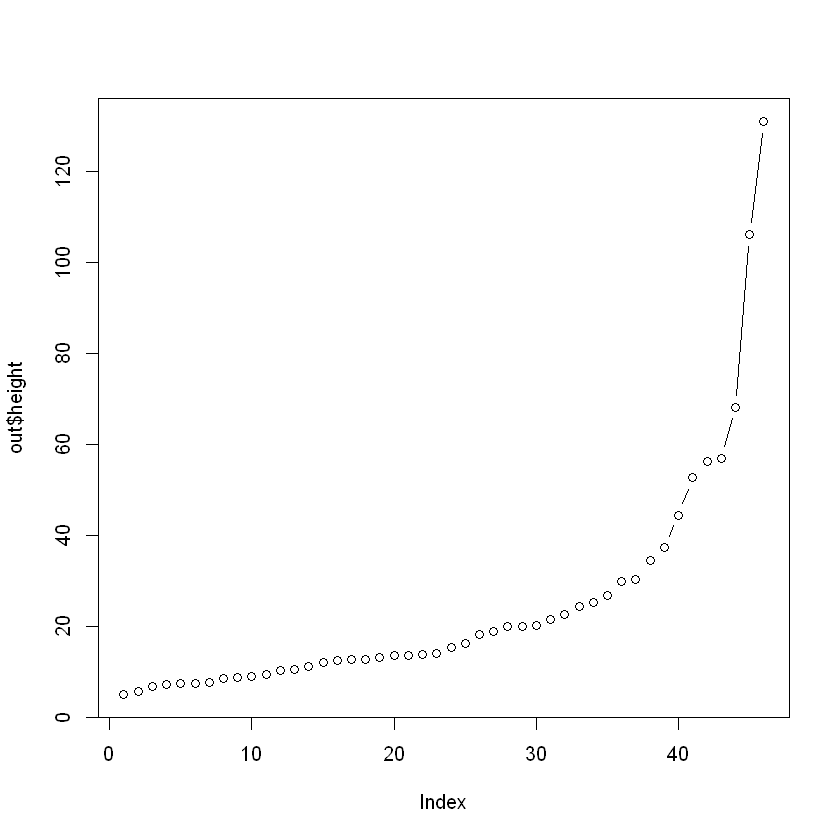

In [89]:
plot(out$height,type='b')

**Start to analyse from the right of the curve (curve going from k=N to k = 1). With this curve we would surely choose k = 4**

### Exercice : Run hcust with the different distance, display and show the results.

"ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) or "centroid" (= UPGMC).

In [90]:
D = dist(swiss)
outw = hclust(D,method='ward.D2')

In [91]:
D = dist(swiss)
outs = hclust(D,method='single')

In [92]:
D = dist(swiss)
outa = hclust(D,method='centroid')

In [93]:
D = dist(swiss)
outc = hclust(D,method='complete')

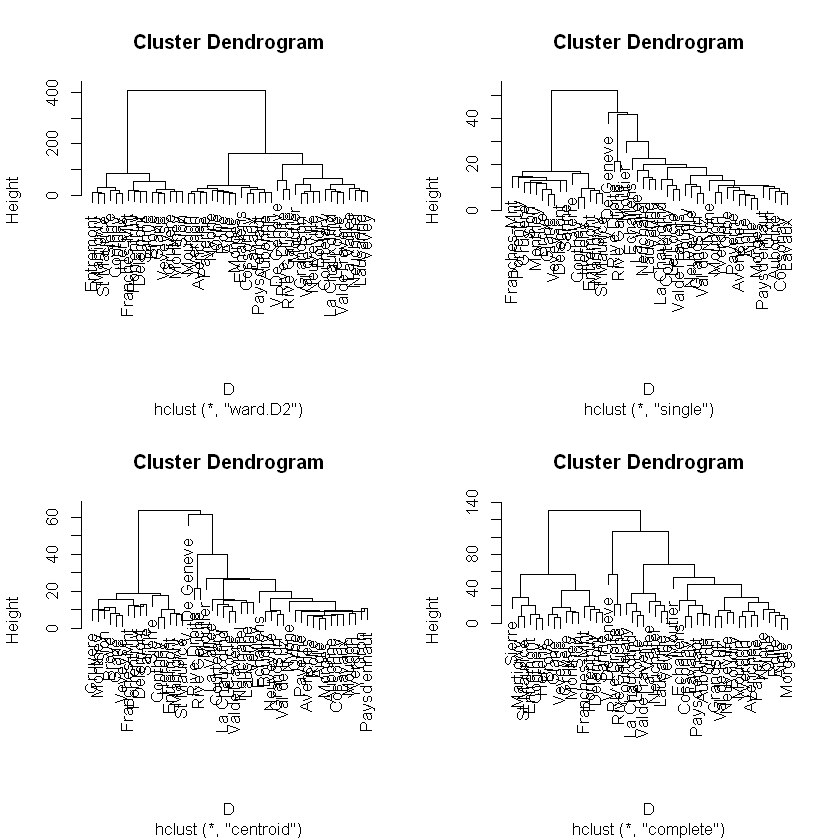

In [94]:
par(mfrow=c(2,2))
plot(outw)
plot(outs)
plot(outa)
plot(outc)

* if looking like a stair("single","centroid"), the method is failing
* "complete" and "ward" are ok for the analysis
* we would choose k=2 for "ward" and k = 3 for "complete"

We cut the trees and look at the results using pairs plot in order to understand the data

In [95]:
cutw = cutree(outw,k=2)
cutc = cutree(outc,k=3)

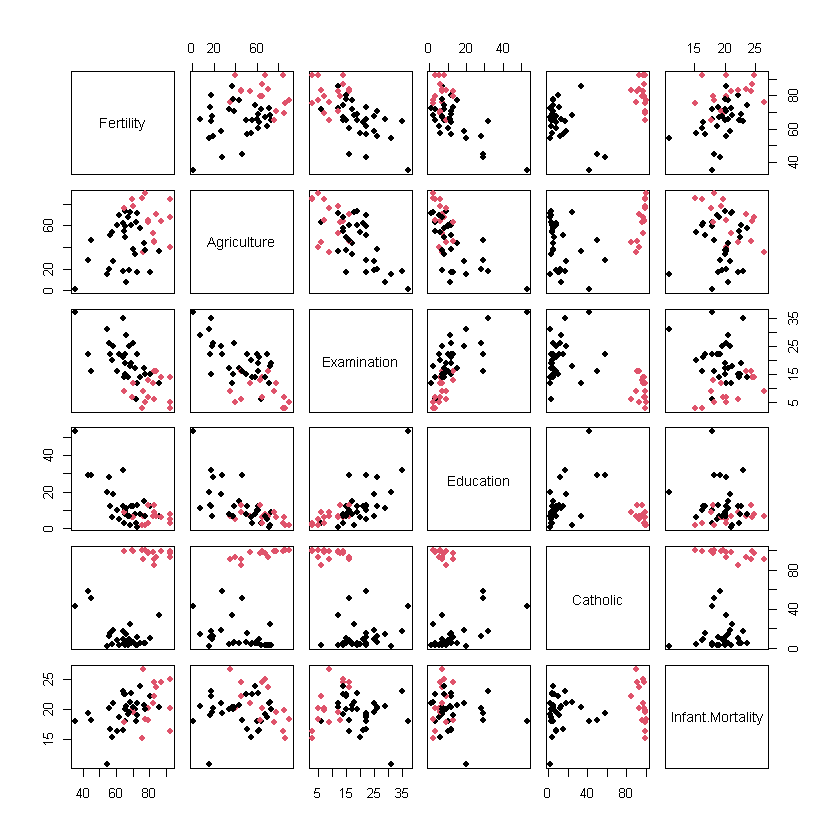

In [96]:
pairs(swiss,col=cutw,pch=19)

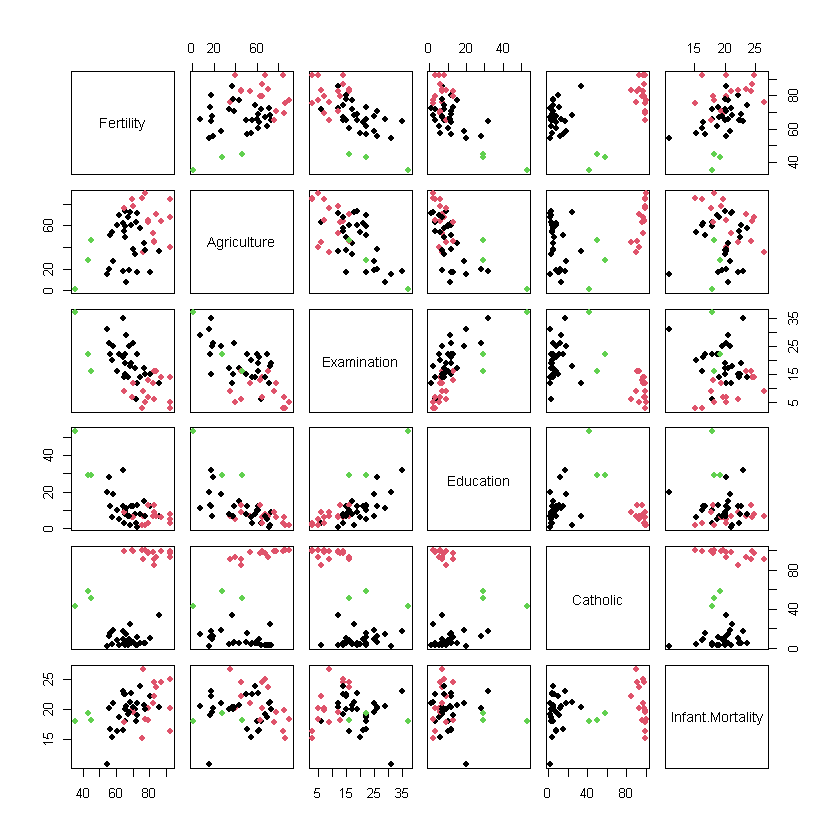

In [97]:
pairs(swiss,col=cutc,pch=19)

**With 3 groups the green points are well detached to other (for education, fertility) so the interpretation is really more interesting then with k=2 : better understanding of the datas**

## Compare the results of  K-Means and HCA both with K=3

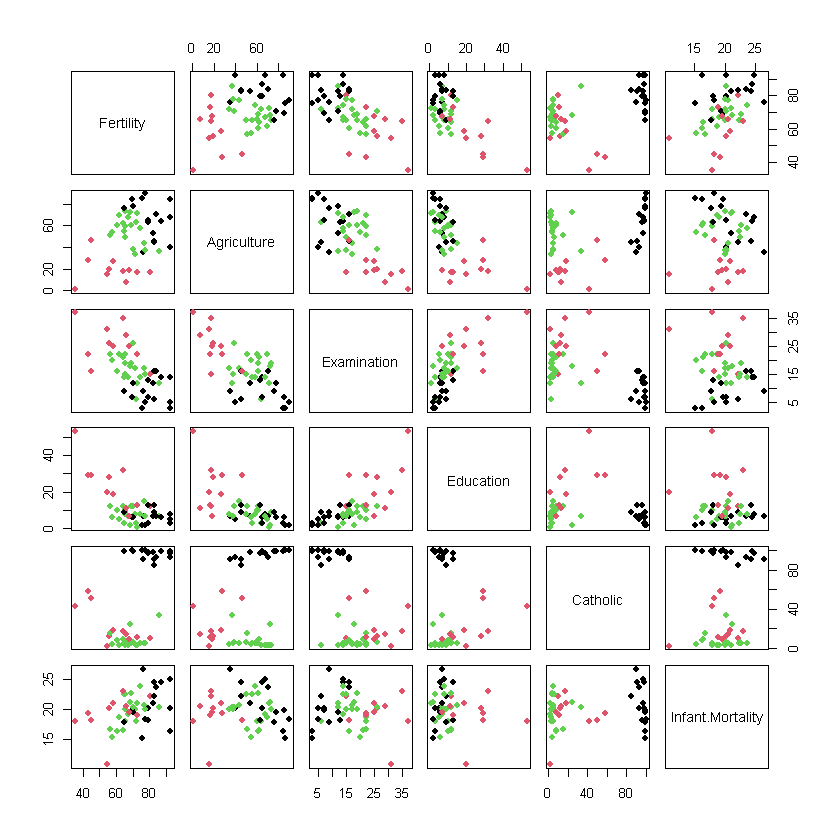

In [98]:
out = kmeans(swiss, centers = 3,nstart = 10)
pairs(swiss,col=out$cluster,pch=19)

**Better clustering for HClust, but remember that for K-Means the best k was 4**

**In conclusion :**
* k= 3 HCA is better
* k = 4 K-Means is interesting because the protestant group is divided in an interesting way


# EM Algorythm with Gaussian Mixture Model (GMM)

## Try to code simple EM algorythm ofr GMM with fixed covariances matrices to simplify

identity matrix

In [99]:
myEM <- function(x,K,maxit=20) {
    # this algo implements for univariate data
    n=length(x)
    prop = rep(1/K,K) # pi parameter
    mu= rnorm(K)
    P=matrix(NA,nrow=n,ncol=K)
    for(it in 1:maxit){
        # E step
        for (k in 1:K){
            P[,k] = prop[k] * dnorm(x,mean = mu[k],sd = 1)
        }
        P = P / t(t(rowSums(P)))%*%matrix(1,nrow=1,ncol=K) # normalisation
        # M Step
        for (k in 1:K){
            prop[k] = sum(P[,k]) / n
            mu[k] = sum(P[,k]*x) / sum(P[,k])
        }
        plot(cbind(x,rep(0,300)),col=max.col(P),ylim=c(-0.5,0.5))
        lines(density(x),col='green')
        points(cbind(mu,rep(0,K)),type='p',pch=19,col=1:K,cex=3)
       # lines(density(x[max.col(P)==1]),col='black')
       # lines(density(x[max.col(P)==2]),col='red')
        Sys.sleep(1)
    }
    out = list(P=P,prop=prop,mu=mu)
}

We simulate some data

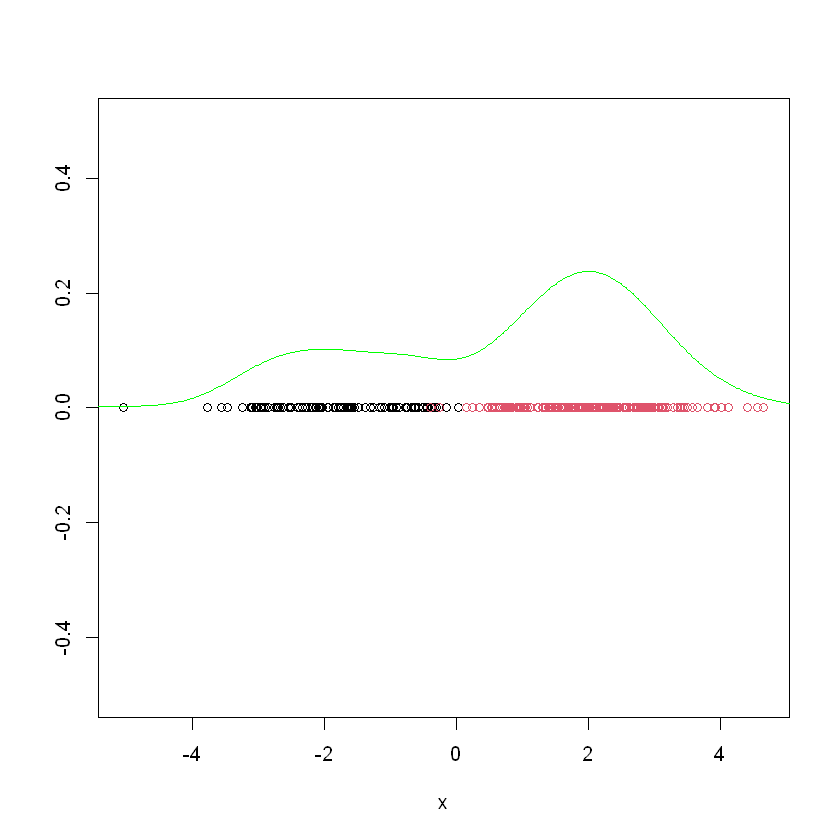

In [100]:
x = c(rnorm(100,-2,1),rnorm(200,2,1))
y = rep(1:2,c(100,200))
#plot(x,col=y)
plot(cbind(x,rep(0,300)),col=y,ylim=c(-0.5,0.5))
lines(density(x),col='green')

This is P(x) 

In [136]:
#run EM
#out=myEM(x,2)

View the effect of each iteration of the EM on the mean, the proportions and the cluster menbership

### With swiss data and Mclust package

In [102]:
install.packages('mclust')


Warning message:
"package 'mclust' is in use and will not be installed"


In [103]:
library(mclust)

In [104]:
mod1 <- Mclust(swiss)
summary(mod1)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEE (ellipsoidal, equal volume, shape and orientation) model with 3
components: 

 log-likelihood  n df       BIC       ICL
      -934.9916 47 41 -2027.839 -2027.839

Clustering table:
 1  2  3 
28 16  3 

In [105]:
names(mod1)

[1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"

In [106]:
mod1$classification

Courtelary     Delemont Franches-Mnt      Moutier   Neuveville   Porrentruy 
           1            2            2            1            1            2 
       Broye        Glane      Gruyere       Sarine      Veveyse        Aigle 
           2            2            2            2            2            1 
     Aubonne     Avenches     Cossonay    Echallens     Grandson     Lausanne 
           1            1            1            1            1            1 
   La Vallee       Lavaux       Morges       Moudon        Nyone         Orbe 
           1            1            1            1            1            1 
        Oron      Payerne Paysd'enhaut        Rolle        Vevey      Yverdon 
           1            1            1            1            1            1 
     Conthey    Entremont       Herens     Martigwy      Monthey   St Maurice 
           2            2            2            2            2            2 
      Sierre         Sion       Boudry La Chauxdfnd     Le Locle    Neuchatel 
           2            2            1            1            1            1 
  Val de Ruz ValdeTravers V. De Geneve  Rive Droite  Rive Gauche 
           1            1            3            3            3

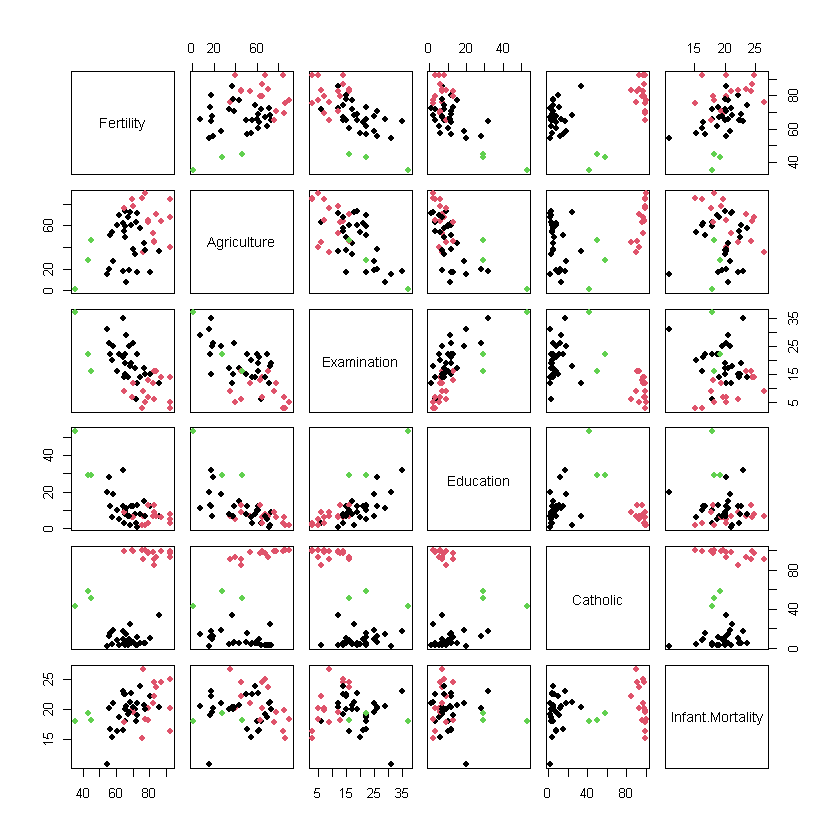

In [107]:
pairs(swiss,col=mod1$classification,pch=19)

**With default parameter, very close to result of HAC with complete linkage**

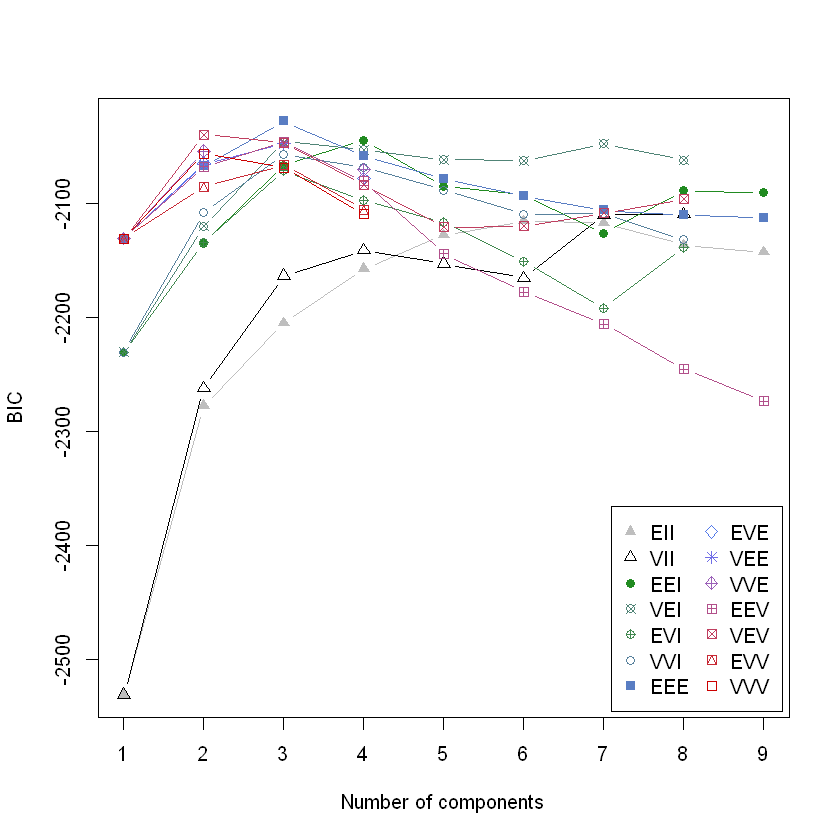

In [108]:
plot(mod1, what = 'BIC')

How to to understand this plot :
* the EEE model : E = equal, EEE : proportion equal, mean , variance
* best of the best : EEE for 3 component
* 14 models * 9 values of K tested !
* pos 1 : proportion : E : Equal, V = Free
* pos 2 : covariance matrix : V : free, I = identity, E : equal
* pos 3 : ??

**If you are expert, it can be intersting to change k and find the best model with a different k**

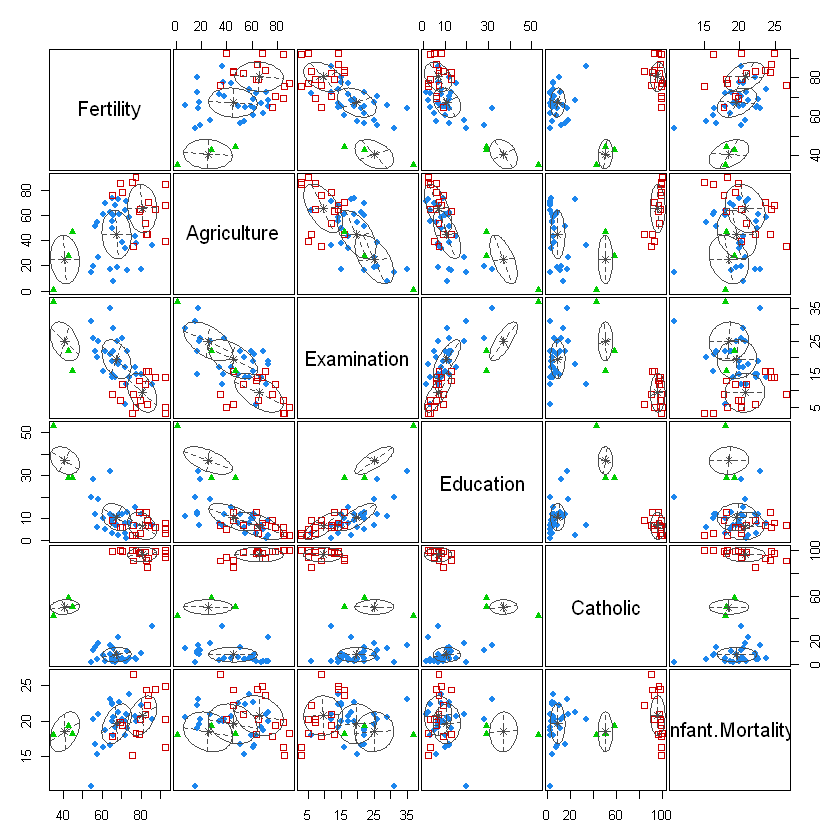

In [109]:
plot(mod1, what = 'c')

We can also visualize the estimated Gaussian with the previous graph

Access also to the probability

The bigger the point is the bigger the uncertainty to belong to the choosen cluster is.

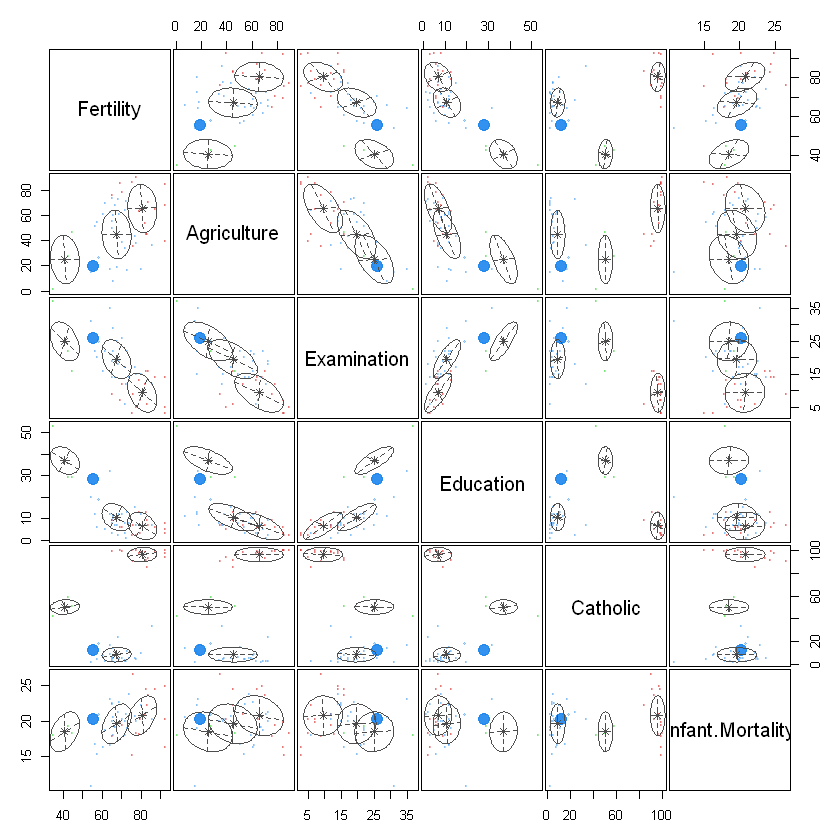

In [110]:
plot(mod1,what="uncertainty")

This information is direcly extract from the output of the Algorythm.

In [111]:
mod1$z # posterior priority to belong to each cluster

Courtelary,1.000000e+00,1.936575e-41,7.572986e-21
Delemont,4.918818e-33,1.000000e+00,3.020169e-14
Franches-Mnt,4.930018e-40,1.000000e+00,4.121262e-22
Moutier,1.000000e+00,5.704706e-19,1.283381e-12
Neuveville,1.000000e+00,2.002089e-45,2.831415e-22
Porrentruy,6.729864e-38,1.000000e+00,1.657370e-15
Broye,1.373874e-38,1.000000e+00,2.197023e-22
Glane,3.066321e-43,1.000000e+00,1.218175e-25
Gruyere,2.375623e-43,1.000000e+00,9.018504e-23
Sarine,1.099925e-37,1.000000e+00,2.392042e-18
Veveyse,2.954360e-44,1.000000e+00,2.005166e-25


Other package implement the EM algorithm for continuous but also categorical one. Rmixmod package allows to deal with both.

**It is also possible to get the datas of the 'average guy' of each cluster**

In [112]:
mod1$parameters$mean

Fertility,67.335714,80.55000,40.83333
Agriculture,44.900000,65.51875,25.16667
Examination,19.607143,9.43750,25.00000
Education,10.678571,6.62500,37.00000
Catholic,8.723571,96.15000,50.36667
Infant.Mortality,19.621429,20.77500,18.50000


Ex : cluster the wine data and evaluate the quality of the clustering regarding the know labels

In [113]:
warn=0
library(MBCbook)
warn=1

In [114]:
data('wine27')

In [115]:
X=wine27[,1:27]

In [116]:
mod1 <- Mclust(X)
summary(mod1)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 3 components: 

 log-likelihood   n  df       BIC       ICL
      -11557.21 178 162 -23953.87 -23955.04

Clustering table:
 1  2  3 
65 63 50 

In [117]:
names(mod1)

[1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"

**Mclust find by itself the three clusters**

A way to compare : confusion matrix

In [118]:
table(wine27$Type,mod1$classification)

            
              1  2  3
  Barbera     0  0 48
  Barolo     58  1  0
  Grignolino  7 62  2

**Globaly the result is very good : error = 10 errors over 178 = 5%**

**Try the same classification with K-Means**

In [119]:
out = kmeans(X, centers = 3)

In [120]:
names(out)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [121]:
table(wine27$Type,out$cluster)

            
              1  2  3
  Barbera     6  0 42
  Barolo     32 24  3
  Grignolino  6  0 65

**With Kmeans the error ratio is 25% (5% with Hclust)** 

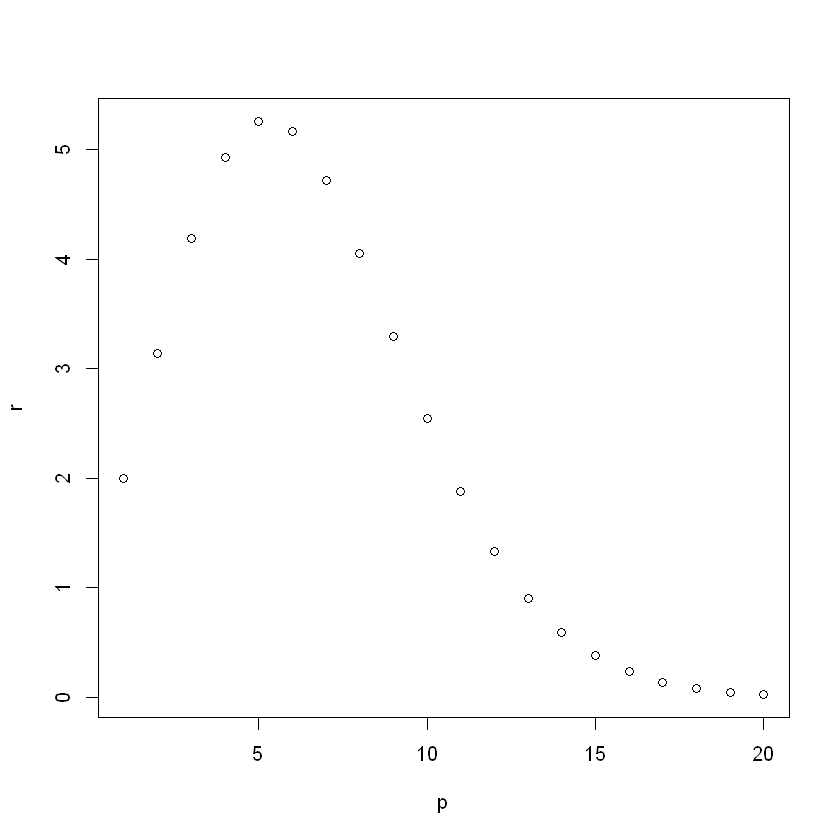

In [122]:
p = seq(1:20)
r= (3.14**(p/2))/gamma((p/2)+1)
plot(p,r)

# Dimension Reduction with PCA

In [123]:
install.packages('FactoMineR')

Warning message:
"package 'FactoMineR' is in use and will not be installed"


In [124]:
library(FactoMineR)

In [125]:
data(decathlon)

In [126]:
head(decathlon)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar


We just take the 10 first columns

In [127]:
X=decathlon[,1:10]

Run PCA on those datas

In [128]:
pc=princomp(X)
pc

Call:
princomp(x = X)

Standard deviations:
     Comp.1      Comp.2      Comp.3      Comp.4      Comp.5      Comp.6 
11.61065403  4.78910847  3.12206072  1.05698409  0.58972067  0.36425523 
     Comp.7      Comp.8      Comp.9     Comp.10 
 0.24917123  0.22222732  0.15825005  0.07006272 

 10  variables and  41 observations.

**Now we have to select the number of dimension component to retain**

1) look at the summary and use the cumulative proportion regarding 90% => we should here keep 2 components (93,2%)

In [129]:
summary(pc)

Importance of components:
                           Comp.1    Comp.2    Comp.3      Comp.4      Comp.5
Standard deviation     11.6106540 4.7891085 3.1220607 1.056984087 0.589720672
Proportion of Variance  0.7965959 0.1355296 0.0575980 0.006601788 0.002055026
Cumulative Proportion   0.7965959 0.9321255 0.9897235 0.996325247 0.998380274
                             Comp.6      Comp.7      Comp.8       Comp.9
Standard deviation     0.3642552340 0.249171229 0.222227318 0.1582500495
Proportion of Variance 0.0007840365 0.000366877 0.000291823 0.0001479832
Cumulative Proportion  0.9991643100 0.999531187 0.999823010 0.9999709933
                            Comp.10
Standard deviation     7.006272e-02
Proportion of Variance 2.900673e-05
Cumulative Proportion  1.000000e+00

2) use the screeplot
Applying the rule of the break, the choice could be 3.

screeplot(pc)

3) with scree-test of Cattel, the choice is also d= 3

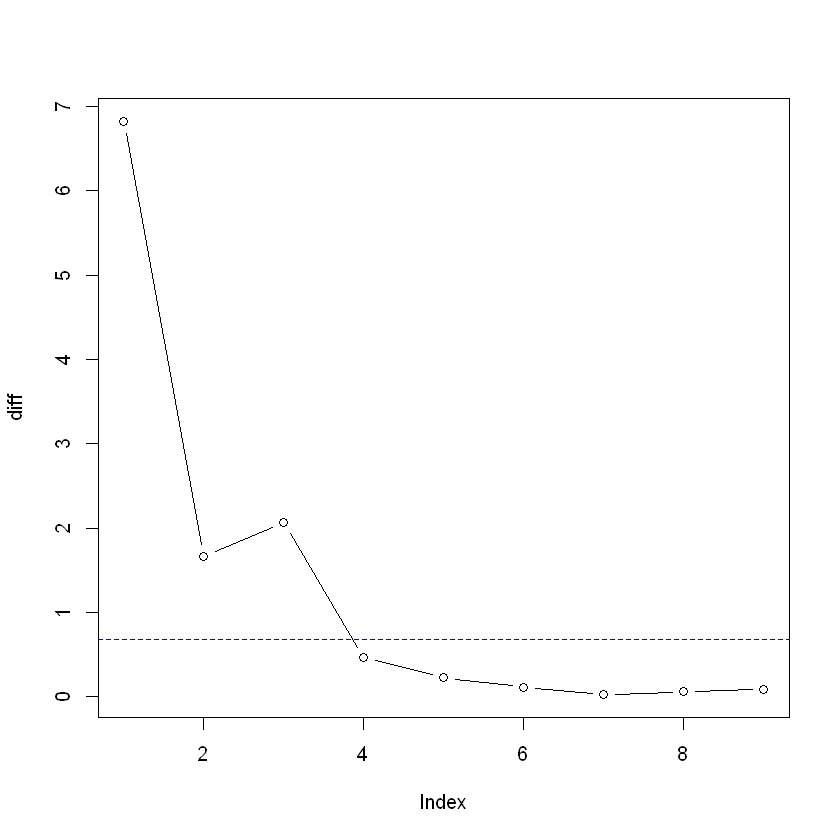

In [130]:
diff=abs(diff(pc$sdev))
plot(diff,type='b')
abline(h=0.1*max(diff),lty=2,col='blue')

**We can now look art the correlation circle**

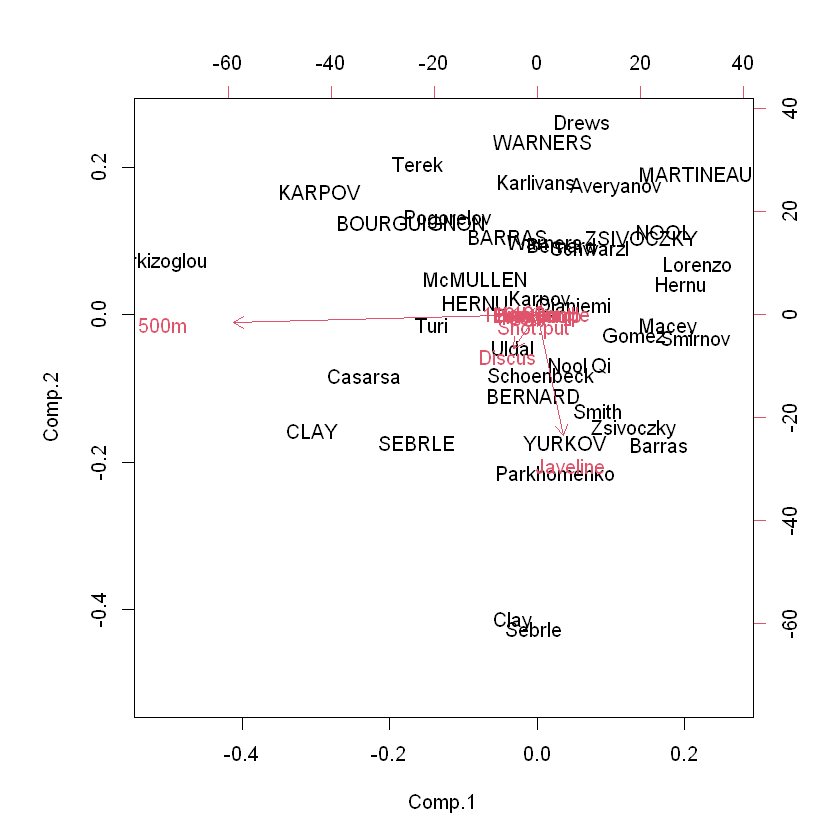

In [131]:
biplot(pc)

in red : correlation circle

in black : score plot : projection of the datas on the two best coponent

To have a clearer view of correlation circle, it's better to use (FactoMineR package) 

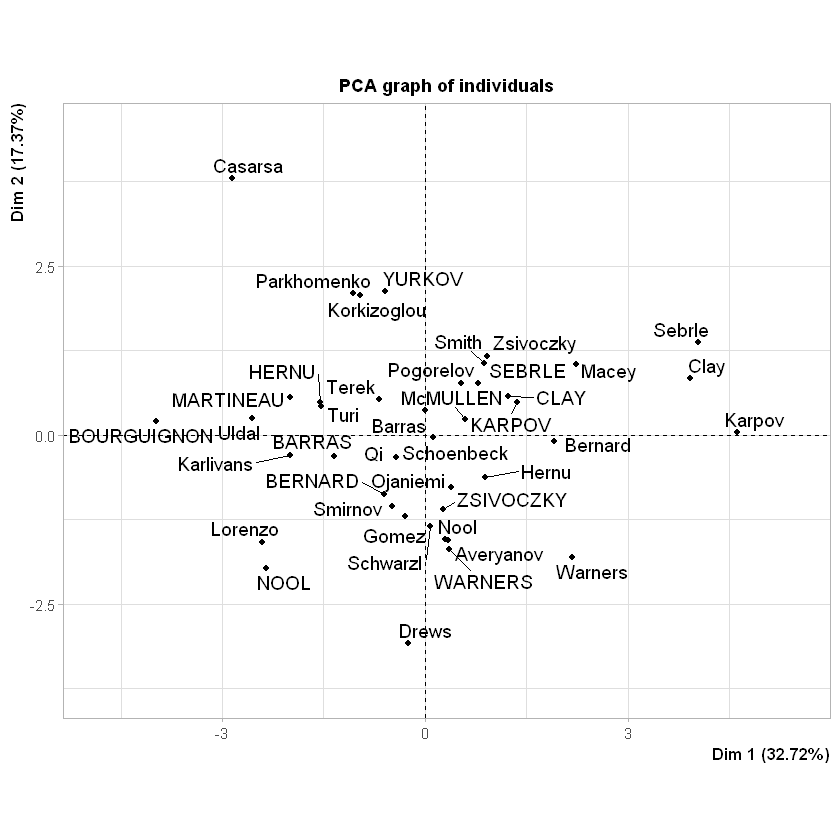

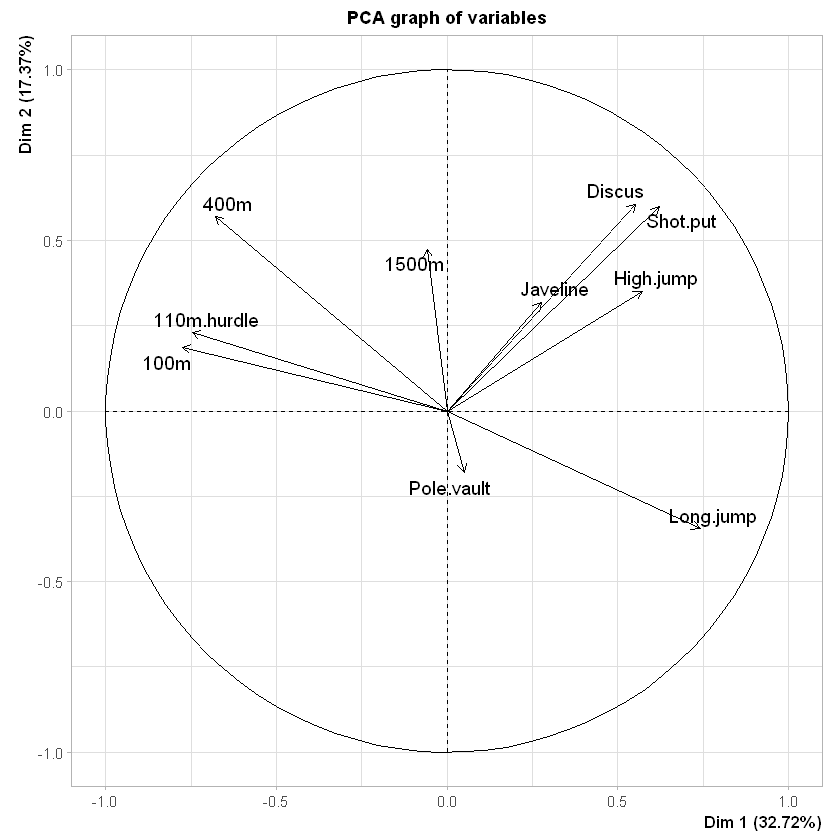

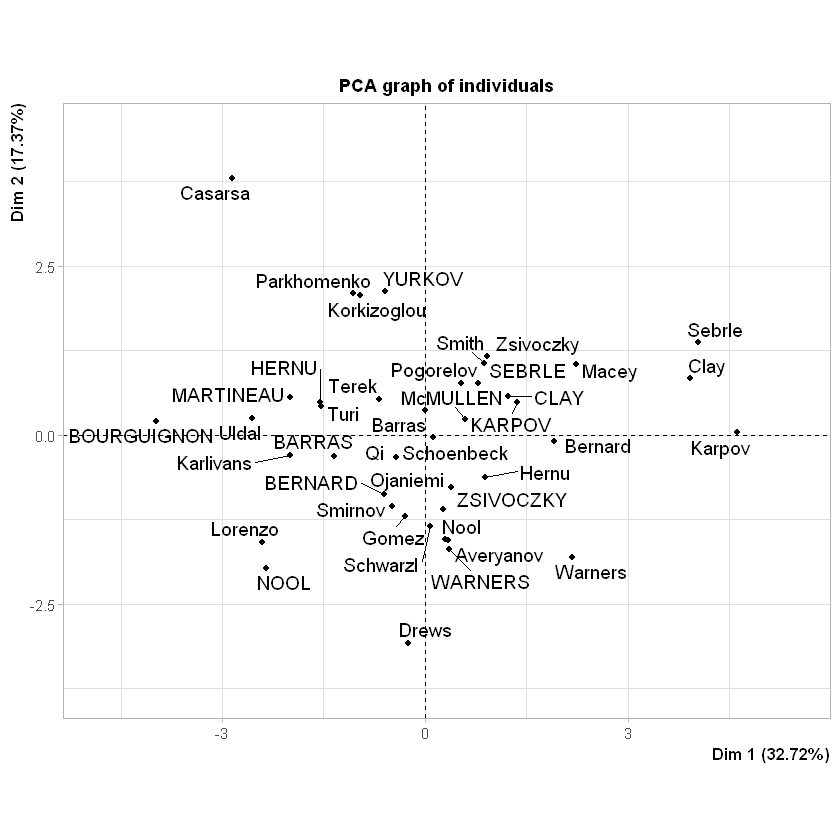

In [132]:
pc=PCA(X,scale.unit=TRUE)
plot(pc)

# Clustering with HDclassif

In [133]:
install.packages('HDclassif')

Warning message:
"package 'HDclassif' is in use and will not be installed"


In [134]:
library(HDclassif)

In [135]:
data(wine27)
X=scale(wine27[,1:27])
Y=wine27$Type
out = hddc(X,3)
table(Y,out$cl)

            
Y             1  2  3
  Barbera     0  0 48
  Barolo     58  1  0
  Grignolino  2 68  1

**With this HDCC algorythme the result is even better then with : 2.2% of error**